<a href="https://colab.research.google.com/github/konerjonlar/Nlp/blob/main/Nlp_Giri%C5%9F_Miuul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLTK (Natural Language Toolkit)

    

*   **Tanım**: NLTK, doğal dil işleme (NLP) için kullanılan popüler bir Python kütüphanesidir.
*   **Kullanım Alanları**: Metin analizi, dilbilimsel veri işleme, sözcük dağarcığı oluşturma, metin sınıflandırma, duygu analizi, ve daha fazlası.

*   **Özellikler**:
  *      Çeşitli dil işleme algoritmaları ve araçları içerir.
  *     Çeşitli dil veritabanları ve kaynaklar (corpora) sağlar.
  *    Metin tokenization, stemming, lemmatization gibi temel NLP görevlerini yerine getirir.

In [26]:
!pip install nltk

TextBlob

*    **Tanım**: TextBlob, metin işleme ve NLP için basit bir kütüphanedir.
*    **Kullanım Alanları**: Duygu analizi, dil algılama, kelime çevirisi, dilbilgisi düzeltme, cümle yapılandırma.
*    **Özellikler**:
   *   Kullanımı kolaydır ve Python string nesneleri ile iyi entegre olur.
   *   NLTK ve Pattern kütüphanelerine dayanır.
   *   Hızlı prototip oluşturma ve basit NLP görevleri için idealdir.

In [27]:
!pip install textblob

WordCloud

*    **Tanım**: WordCloud, kelime bulutu (word cloud) oluşturmak için kullanılan bir Python kütüphanesidir.
*    **Kullanım Alanları**: Metin veri setlerindeki kelime frekanslarını görselleştirme.
*    **Özellikler**:
  *      Metindeki en sık kullanılan kelimeleri görselleştirir.
  *      Kelimelerin boyutları, frekanslarına göre değişir.
  *      Görsellerin özelleştirilmesine imkan tanır (renkler, şekiller, fonlar).

In [28]:
!pip install wordcloud

`scikit-learn`, Python dilinde yazılmış, açık kaynak kodlu ve çok geniş kullanılan bir makine öğrenimi kütüphanesidir. Temel özellikleri ve kullanım alanları şunlardır:

1. **Makine Öğrenimi Algoritmaları**: Sınıflandırma, regresyon, kümeleme ve boyut indirgeme gibi birçok makine öğrenimi algoritmasını içerir. Örneğin, destek vektör makineleri (SVM), karar ağaçları, k-nearest neighbors (KNN), ve k-means gibi algoritmalar bulunmaktadır.

2. **Öznitelik İşleme**: Veri ön işleme, öznitelik mühendisliği ve veri dönüşümü gibi işlemleri destekler. Bu kapsamda, standartlaştırma, normalizasyon, eksik veri işleme ve öznitelik seçim gibi araçlar sunar.

3. **Model Seçimi ve Değerlendirme**: Model doğrulama, çapraz doğrulama ve hiperparametre optimizasyonu gibi model seçim ve değerlendirme yöntemleri sağlar.

4. **Veri Kümeleme ve Bölme**: Veriyi eğitim ve test setlerine ayırma gibi veri bölme işlemleri yapabilir.

5. **Model Kaydetme ve Yükleme**: Eğitilmiş modelleri kaydedip daha sonra tekrar yükleyebilme imkanı sunar.

6. **Basit ve Kullanıcı Dostu API**: Kullanımı kolay bir API sunarak, hızlı bir şekilde model oluşturma ve değerlendirme imkanı sağlar.

`scikit-learn`, makine öğrenimi uygulamaları geliştirmek için güçlü, esnek ve geniş kapsamlı bir araçtır ve veri bilimi ile makine öğrenimi projelerinde yaygın olarak kullanılır.

In [51]:
!pip install scikit-learn

In [29]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Text Preprocessing(Metin Ön İşleme)


Metin verilerinin analiz için uygun hale getirilmesi sürecidir. Bu adım genellikle aşağıdaki işlemleri içerir:
- **Temizleme**: Gereksiz karakterler, semboller ve sayıları temizleme.
- **Tokenization**: Metni kelimelere veya cümlelere ayırma.
- **Stop Words Removal**: Anlam taşımayan, sıkça tekrar eden kelimeleri (örneğin “ve”, “bu”, “bir”) çıkartma.
- **Stemming ve Lemmatization**: Kelimelerin köklerine indirme işlemleri.
- **Dönüştürme**: Tüm metinlerin küçük harfe dönüştürülmesi veya büyük harfe dönüştürülmesi gibi işlemler.





In [31]:
df = pd.read_csv("datasets/amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


## Normalizing Case Folding

### Normalizing (Normalizasyon)
Normalizasyon, metin verilerinin analiz ve işleme için daha tutarlı ve standart bir formata dönüştürülmesi sürecidir. Bu işlem, metnin farklı formatlardan, yazım hatalarından veya dilbilgisel hatalardan arındırılması anlamına gelir. Normalizasyon işlemleri şunları içerebilir:
- **Boşlukların Düzenlenmesi**: Fazladan boşlukların kaldırılması.
- **Özel Karakterlerin Çıkarılması**: Özel karakterlerin (örneğin, @, #, $, %) metinden çıkarılması.
- **Dilbilgisel Düzeltmeler**: Yaygın yazım hatalarının düzeltilmesi.
- **Lemmatization/Stemming**: Kelimelerin kök formlarına indirgenmesi.





In [32]:
df['reviewText'] = df['reviewText'].str.lower()

### Case Folding
Case Folding, metindeki tüm harflerin büyük harften küçük harfe (veya tam tersi) dönüştürülmesi işlemidir. Bu işlem, metin analizinde tutarlılık sağlamak için önemlidir, çünkü "Kitap" ve "kitap" gibi kelimeler teknik olarak aynı anlama gelir, ancak farklı büyük/küçük harf formatlarında yazıldıklarında ayrı kelimeler olarak değerlendirilebilirler.


### Neden Önemlidir?
- **Tutarlılık Sağlar**: Case Folding, verilerin tutarlı bir şekilde işlenmesini sağlar, böylece analiz sırasında büyük ve küçük harf farklılıklarından kaynaklanan hatalar önlenir.
- **Arama ve Eşleme Kolaylığı**: Tüm metnin aynı harf formatında olması, metin içinde kelime arama ve eşleme işlemlerini kolaylaştırır.
- **Veri Boyutunu Azaltır**: Metindeki farklı büyük/küçük harf kombinasyonlarını azaltarak veri setinin boyutunu küçültür ve daha yönetilebilir hale getirir.

### Punctuations(Noktalama İşaretleri)

In [33]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')

### Numbers

In [34]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')

### Stopwords

In [35]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Rarewords

In [36]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

### Tokenization

In [37]:
nltk.download("punkt")

df["reviewText"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never, much, phone, memory, since, download, lot, stuff, brainer, me]"
2,"[works, expected, higher, capacity, think, made, bit, earlier, paint, looks, clean]"
3,"[think, worked, 64gb, card, went, south, 3, one, held, pretty, well, since, s3, update, months, zero, since, transferred, s3, note2, card, reliable]"
4,"[bought, retail, packaging, arrived, legit, version, asian, like, picture, shows, arrived, quickly, bought, 32, 16, retail, packaging, htc, one, lg, cards, working, probably, best, price, get, nice, sd, card]"


### Lemmatization

In [38]:
nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Text Visualization(Metin Görselleştirme)



Metin verilerini görsel olarak sunma işlemidir. Bu, verinin daha iyi anlaşılmasını sağlar. Yaygın yöntemler:
- **Word Cloud**: Kelimelerin büyüklüklerine göre görselleştirilmesi.
- **Bar Chart ve Histogram**: Kelime frekanslarının görselleştirilmesi.
- **Heatmap**: Kelime veya cümlelerin ilişkilerinin görselleştirilmesi.



## Terim Frekanslarının Hesaplanması

In [39]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
26,card,4130.00
15,work,1879.00
7,phone,1220.00
109,memory,1192.00
65,sd,1133.00
...,...,...
2587,upto,2.00
2591,"mostly,",2.00
4478,alway,2.00
5863,4.9,2.00


## Barplot

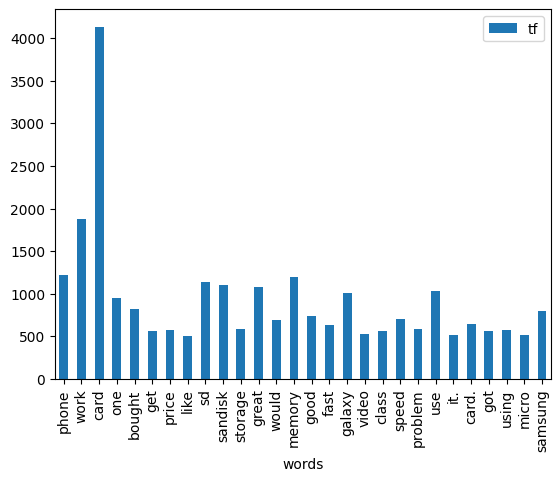

In [40]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

## Wordcloud

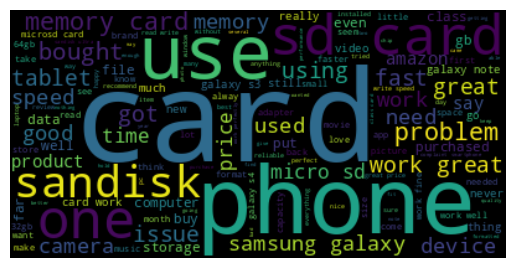

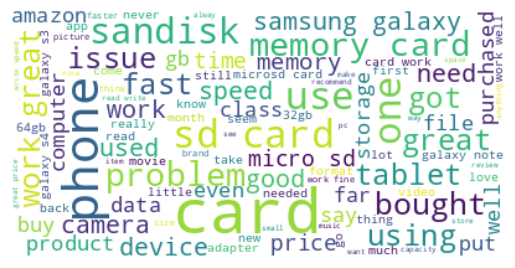

In [41]:
text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

## Şablonlara Göre Wordcloud

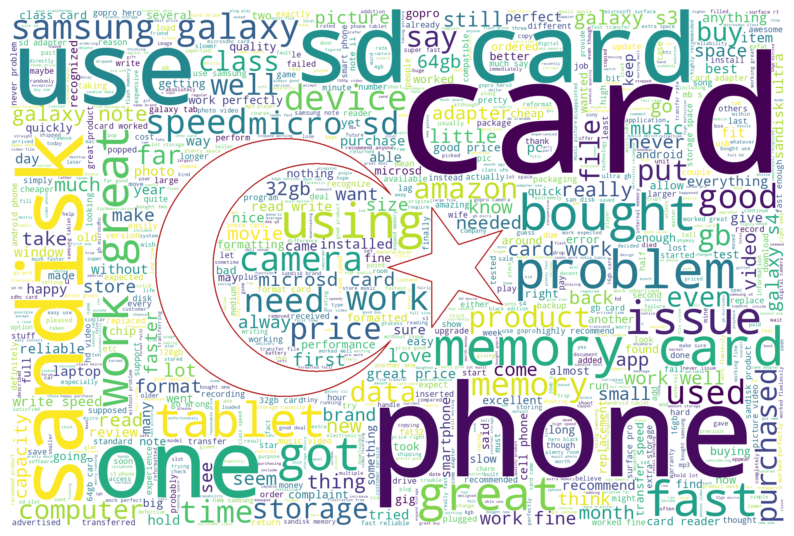

In [42]:
tr_mask = np.array(Image.open("tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=tr_mask,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# 3. Sentiment Analysis(Duygu Analizi)

Metinlerin duygusal tonunu veya duygusal içeriğini analiz etme sürecidir. Bu analiz, genellikle:
- **Pozitif, Negatif, Nötr**: Metnin olumlu, olumsuz veya nötr olup olmadığını belirleme.
- **Duygu Puanı**: Metnin duygusal tonunu bir puanla ifade etme (örneğin, -1 ile 1 arasında).


In [43]:
df["reviewText"].head()

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")


sia.polarity_scores("I liked this music but it is not good as the other one")


df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 4. Feature Engineering(Özellik Mühendisliği)

Makine öğrenimi modelleri için veri setine anlamlı özellikler ekleme sürecidir. Bu adımda:
- **Yeni Özellikler Oluşturma**: Mevcut veriden yeni özellikler türetme (örneğin, kelime uzunluğu, kelime sayısı).
- **Özellik Ölçekleme**: Özelliklerin ölçeklenmesi (örneğin, normalization veya standardizasyon).
- **Özellik Seçimi**: Model için en uygun olan özellikleri seçme.




In [44]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["sentiment_label"].value_counts()

df.groupby("sentiment_label")["overall"].mean()

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

y = df["sentiment_label"]
X = df["reviewText"]

## Count Vectors

In [45]:
# Count Vectors: frekans temsiller
# TF-IDF Vectors: normalize edilmiş frekans temsiller
# Word Embeddings (Word2Vec, GloVe, BERT vs)


# words
# kelimelerin nümerik temsilleri

# characters
# karakterlerin numerik temsilleri

# ngram
a = """Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinden göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyolarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)


[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinden']),
 WordList(['metin', 'üzerinden', 'göstereceğim']),
 WordList(['üzerinden', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyolarını']),
 WordList(['kelimelerin', 'kombinasyolarını', 'gösterir']),
 WordList(['kombinasyolarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

# word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_c.toarray()

# n-gram frekans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()


vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)


tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

# 5. Sentiment Modeling(Duygu Modelleme)

Duygu analizini gerçekleştiren ve duygusal tonları tahmin eden makine öğrenimi modelleri oluşturma sürecidir. Bu adımda:
- **Model Seçimi**: Duygu analizi için uygun modeli seçme (örneğin, Naive Bayes, LSTM, BERT).
- **Model Eğitimi**: Eğitim verileriyle modelin eğitilmesi.
- **Model Değerlendirme**: Modelin performansının değerlendirilmesi (örneğin, doğruluk, F1 skoru).

---



## Logistic Regression

In [55]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()


new_review = pd.Series("this product is great")
new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

new_review = TfidfVectorizer().fit(X).transform(new_review)

log_model.predict(new_review)

random_review = pd.Series(df["reviewText"].sample(1).values)

new_review = TfidfVectorizer().fit(X).transform(random_review)

log_model.predict(new_review)

array([1])

## Random Forests

In [61]:
print(y,X_count,sep="/")

0       0
1       0
2       1
3       1
4       1
       ..
4910    0
4911    1
4912    1
4913    1
4914    1
Name: sentiment_label, Length: 4915, dtype: int64/  (0, 1709)	1
  (1, 2482)	1
  (1, 936)	1
  (1, 3554)	1
  (1, 231)	1
  (1, 2093)	1
  (1, 2051)	1
  (1, 2306)	1
  (1, 1956)	1
  (1, 2911)	1
  (1, 1001)	1
  (1, 1860)	1
  (1, 3075)	1
  (1, 492)	1
  (1, 1937)	1
  (2, 3553)	1
  (2, 1175)	1
  (2, 1539)	1
  (2, 567)	1
  (2, 3208)	1
  (2, 1883)	1
  (2, 448)	1
  (2, 1042)	1
  (2, 2250)	1
  (2, 1850)	1
  :	:
  (4913, 2990)	1
  (4913, 1272)	1
  (4913, 2781)	1
  (4913, 281)	1
  (4913, 1431)	1
  (4913, 978)	1
  (4914, 138)	1
  (4914, 573)	1
  (4914, 1808)	1
  (4914, 2417)	1
  (4914, 2799)	1
  (4914, 3268)	1
  (4914, 1426)	1
  (4914, 2990)	1
  (4914, 3006)	1
  (4914, 2577)	1
  (4914, 1509)	1
  (4914, 1225)	1
  (4914, 3419)	1
  (4914, 1974)	1
  (4914, 2117)	1
  (4914, 3206)	1
  (4914, 389)	1
  (4914, 3487)	1
  (4914, 812)	1


### Count Vectors

In [69]:
rf_model = RandomForestClassifier().fit(X_count, y)
scores_count = cross_val_score(rf_model, X_count, y, cv=5)
print("Count Vectors - Çapraz doğrulama ortalaması:", scores_count.mean())

Count Vectors - Çapraz doğrulama ortalaması: 0.8488301119023397


### TF-IDF Word-Level

In [70]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
scores_tf_idf_word = cross_val_score(rf_model, X_tf_idf_word, y, cv=5)
print("TF-IDF Word-Level - Çapraz doğrulama ortalaması:", scores_tf_idf_word.mean())

TF-IDF Word-Level - Çapraz doğrulama ortalaması: 0.8292980671414039


### TF-IDF N-GRAM

In [71]:
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
scores_tf_idf_ngram = cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5)
print("TF-IDF N-GRAM - Çapraz doğrulama ortalaması:", scores_tf_idf_ngram.mean())

TF-IDF N-GRAM - Çapraz doğrulama ortalaması: 0.7796541200406918


## Hiperparametre Optimizasyonu

In [75]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            verbose=1).fit(X_count, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)


cross_val_score(rf_final, X_count, y, cv=5).mean()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.8118006103763988